![title](image/title.png)
# THIS REPOSITORY IS CREATED BY:
Ng Crew

1. Sebastian Cahyo Ardhi Iswara 1103174174
2. Adli Farhan Ibrahim 1103174092

# The workflow of this machine learning task:
![title](image/workflow.png)


1. Data Collection
2. Data Preprocessing
3. Data Normalization
4. Model Training
5. Model Validation

# Dependency to run this project:
1. Python 3.XX (Im using 3.77)
2. Jupyterlab (For run ipynb / notebook)
3. Pandas (For data analysis and processing)
4. matplotlib (For data visualization and Dependency for seaborn)
5. seaborn (For data visualization)
4. Sklearn (For data preprocessing and machine learning algorithm)

# 0. Module Import
The first step is we need to import module that used in this project

In [67]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

# 1. Data Collection
in this section, we need to collect our data. We use Bank Marketing Data Set from UCI Dataset, the goals of this dataset is to predict is that particular customer is suitable to offer some promotion or not.

dataset source: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

![title](image/dataset.png)

In [42]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('dataset/bank-additional-full.csv',sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# 2. Data Preprocessing
after the data already loaded, we must check the data is there a duplicate data or null value because machine learning algorithm can take it

In [44]:
df.shape

(41188, 21)

In [45]:
df.isna().sum() / len(df)

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64

In [46]:
for column in df.columns:
    print(df[column].value_counts() / len(df[column]))
    print('\n\n')    

31    0.047271
32    0.044819
33    0.044503
36    0.043216
35    0.042707
        ...   
89    0.000049
91    0.000049
87    0.000024
94    0.000024
95    0.000024
Name: age, Length: 78, dtype: float64



admin.           0.253035
blue-collar      0.224677
technician       0.163713
services         0.096363
management       0.070992
retired          0.041760
entrepreneur     0.035350
self-employed    0.034500
housemaid        0.025736
unemployed       0.024619
student          0.021244
unknown          0.008012
Name: job, dtype: float64



married     0.605225
single      0.280859
divorced    0.111974
unknown     0.001942
Name: marital, dtype: float64



university.degree      0.295426
high.school            0.231014
basic.9y               0.146766
professional.course    0.127294
basic.4y               0.101389
basic.6y               0.055647
unknown                0.042027
illiterate             0.000437
Name: education, dtype: float64



no         0.791201
unknown    0.208726
yes  

In [47]:
df[df.duplicated() == True]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,33,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,127,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,123,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,114,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,348,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


There are 12 duplicate data and a null value feature that named 'unlnown', we must remove these data so our model can do a prediction

In [48]:
df_new = df.drop_duplicates(keep='last')

In [49]:
df_new.select_dtypes(include=['object']).columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [50]:
df_new = df_new[(df_new['job'] != 'unknown') & (df_new['marital'] != 'unknown') & (df_new['education'] != 'unknown') & (df_new['default'] != 'unknown') & (df_new['housing'] != 'unknown') & (df_new['loan'] != 'unknown') & (df_new['contact'] != 'unknown') & (df_new['month'] != 'unknown') & (df_new['day_of_week'] != 'unknown') & (df_new['poutcome'] != 'unknown')]

In [51]:
for column in df.columns:
    print(df_new[column].value_counts() / len(df_new[column]))
    print('\n\n')    

31    0.053908
32    0.050988
33    0.050003
30    0.047280
34    0.046952
        ...   
91    0.000066
89    0.000066
94    0.000033
87    0.000033
95    0.000033
Name: age, Length: 76, dtype: float64



admin.           0.286567
blue-collar      0.186167
technician       0.179441
services         0.093707
management       0.075825
retired          0.039865
self-employed    0.035829
entrepreneur     0.035731
unemployed       0.024214
housemaid        0.022639
student          0.020014
Name: job, dtype: float64



married     0.573758
single      0.309699
divorced    0.116543
Name: marital, dtype: float64



university.degree      0.341492
high.school            0.252543
professional.course    0.141676
basic.9y               0.140298
basic.4y               0.078089
basic.6y               0.045541
illiterate             0.000361
Name: education, dtype: float64



no     0.999902
yes    0.000098
Name: default, dtype: float64



yes    0.541899
no     0.458101
Name: housing, dtype: float

In [52]:
df_new.shape

(30478, 21)

Our data is already clean from duplicate and null value, now we need to check the statistic from this data

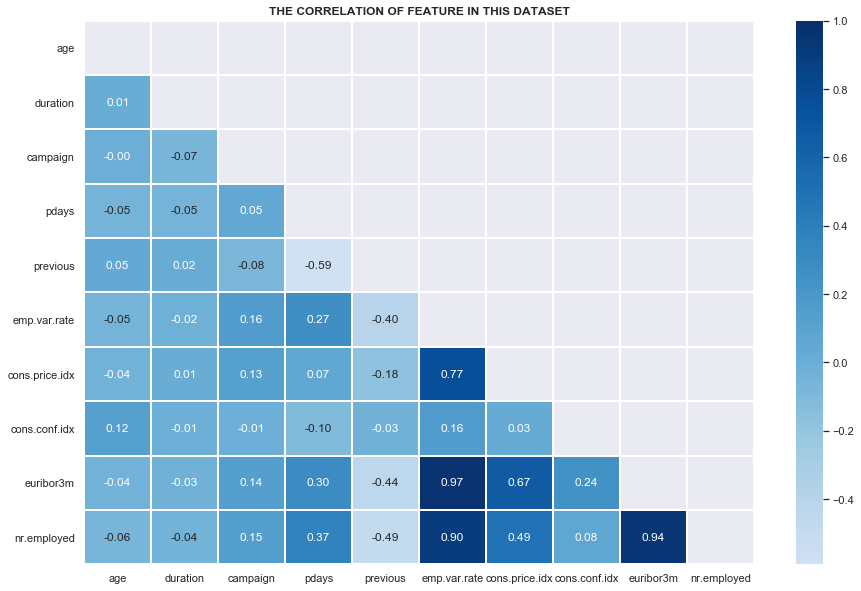

In [53]:
sns.set()
corr = df_new.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=[15,10])
plt.title('THE CORRELATION OF FEATURE IN THIS DATASET',fontweight='bold')
sns.heatmap(corr, mask=mask, cmap='Blues', center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

In [54]:
df_new.describe().T

,count,mean,std,min,25%,50%,75%,max
age,30478.0,39.029694,10.332746,17.000,31.000,37.000,45.000,95.000
duration,30478.0,259.513124,261.746393,0.000,103.000,181.000,321.000,4918.000
campaign,30478.0,2.521721,2.720495,1.000,1.000,2.000,3.000,43.000
pdays,30478.0,956.318295,201.404843,0.000,999.000,999.000,999.000,999.000
previous,30478.0,0.194337,0.522862,0.000,0.000,0.000,0.000,7.000
emp.var.rate,30478.0,-0.071425,1.610306,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,30478.0,93.523376,0.585366,92.201,93.075,93.444,93.994,94.767
cons.conf.idx,30478.0,-40.602579,4.788790,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,30478.0,3.459976,1.777215,0.634,1.313,4.856,4.961,5.045
nr.employed,30478.0,5160.813967,75.158267,4963.600,5099.100,5191.000,5228.100,5228.100


In [55]:
df_new.var()

age                 106.765631
duration          68511.174468
campaign              7.401093
pdays             40563.910661
previous              0.273385
emp.var.rate          2.593086
cons.price.idx        0.342654
cons.conf.idx        22.932511
euribor3m             3.158493
nr.employed        5648.765108
dtype: float64

Because the variance is jommplang, we need to normalize all numeric data it using RobustScaler

In [56]:
numeric = ['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
for col in df_new[numeric]:
    df_new[col] = RobustScaler().fit_transform(df_new[[col]])

In [57]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [58]:
df_new.select_dtypes(include='object').columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [59]:
cat = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome']

for col in df_new[cat]:
    df_new[col] = LabelEncoder().fit_transform(df_new[[col]])

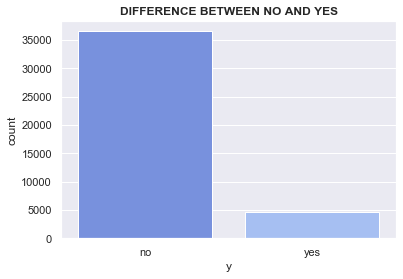

In [94]:
sns.set_palette('coolwarm')
sns.countplot('y',data=df)
plt.title('DIFFERENCE BETWEEN NO AND YES',fontweight='bold')
plt.show()

Because the difference is too great, we must balance the amount of data so our model can learn more accurately

In [74]:
y_no = df_new[df_new['y'] == 'no']
y_yes = df_new[df_new['y'] == 'yes']

In [75]:
y_no.shape

(26620, 21)

In [76]:
y_yes.shape

(3858, 21)

In [77]:
y_no = y_no.sample(len(y_yes),random_state=46)

In [79]:
df_new = pd.concat([y_no,y_yes])

In [60]:
df_new.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.357143,3,1,0,0,0,0,1,6,1,0.366972,-0.5,0.0,0.0,1,0.0,0.598477,0.857143,0.000274,0.0,no
2,0.000000,7,1,3,0,1,0,1,6,1,0.206422,-0.5,0.0,0.0,1,0.0,0.598477,0.857143,0.000274,0.0,no
3,0.214286,0,1,1,0,0,0,1,6,1,-0.137615,-0.5,0.0,0.0,1,0.0,0.598477,0.857143,0.000274,0.0,no
4,1.357143,7,1,3,0,0,1,1,6,1,0.577982,-0.5,0.0,0.0,1,0.0,0.598477,0.857143,0.000274,0.0,no
6,1.571429,0,1,5,0,0,0,1,6,1,-0.192661,-0.5,0.0,0.0,1,0.0,0.598477,0.857143,0.000274,0.0,no


the last step, we need to split our data into X variable and y (Target) variable

In [80]:
y = df_new['y']
X = df_new.drop('y',axis=1)

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.25)

# 3. Model Training
Before we do model training, we must split the data to 2 type, which is training data and test data

In [82]:
clf = LogisticRegression(n_jobs=-1)
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [83]:
accuracy_score(y_test,clf.predict(X_test))

0.8574390876101607

In [84]:
confusion_matrix(y_test,clf.predict(X_test))

array([[826, 139],
       [136, 828]], dtype=int64)

In [85]:
print(classification_report(y_test,clf.predict(X_test)))

precision    recall  f1-score   support

          no       0.86      0.86      0.86       965
         yes       0.86      0.86      0.86       964

    accuracy                           0.86      1929
   macro avg       0.86      0.86      0.86      1929
weighted avg       0.86      0.86      0.86      1929



Because the accuracy is over 85%, we decide to not tuning the parameter because the accuracy is already good